## 청년 AI.Big Data 아카데미 예측분석

In [5]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [7]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [10]:
import os
import pandas as pd

os.getcwd()

'/home/piai/바탕화면/01 실습파일/2. Big Data 분석'

In [11]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

### 앙상블_그래디언트부스팅 연습 (160 P)

In [12]:
# 161 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [14]:
# 162 Page
df_raw = pd.read_csv("체질검사.csv", encoding = "euc-kr")
# 단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw)
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy["FAT"]
df_raw_x = df_raw_dummy.drop("FAT", axis = 1, inplace = False)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234) 

In [15]:
# 163 Page
# 모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Score on training set: 0.980
Score on test set: 0.583


In [16]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [17]:
# 164 Page
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.851,0.584
2,30,0.898,0.599
3,40,0.921,0.599
4,50,0.938,0.592
5,60,0.952,0.586
6,70,0.961,0.586
7,80,0.968,0.584
8,90,0.975,0.580
9,100,0.980,0.583


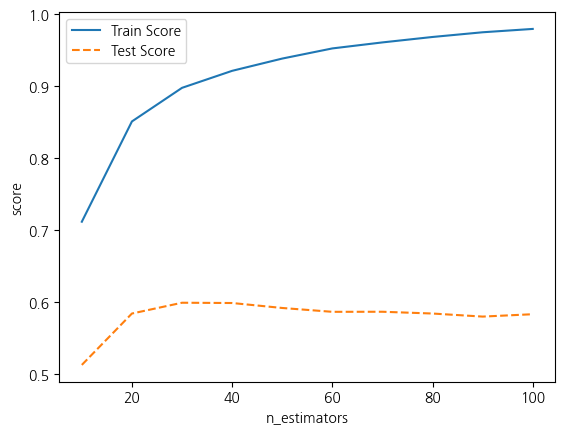

In [18]:
# 165 Page
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [19]:
# 166 Page
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.898,0.599
1,2,0.899,0.599
2,3,0.897,0.604
3,4,0.895,0.600
4,5,0.889,0.610
5,6,0.888,0.596
6,7,0.884,0.592
7,8,0.878,0.608
8,9,0.877,0.597
9,10,0.871,0.601


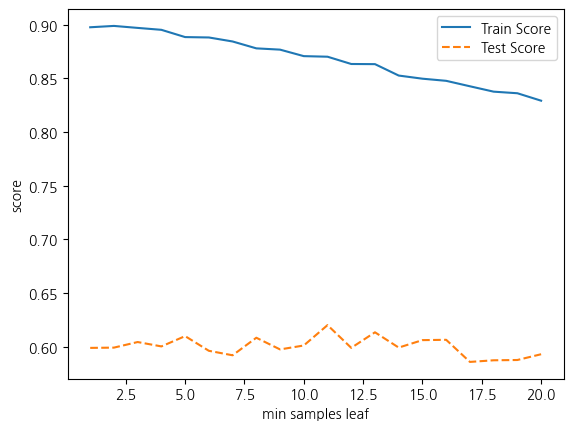

In [20]:
# 167 Page
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [21]:
# 168 Page
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.870,0.620
1,4,0.870,0.620
2,6,0.870,0.620
3,8,0.870,0.620
4,10,0.870,0.620
5,12,0.870,0.620
6,14,0.870,0.620
7,16,0.870,0.620
8,18,0.870,0.620
9,20,0.870,0.620


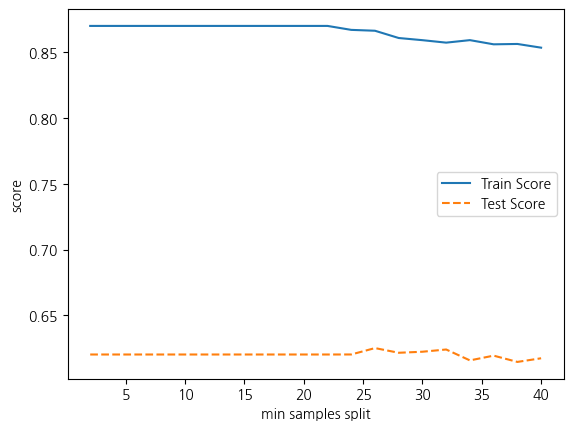

In [22]:
# 169 Page
# 모델 설명력 그래프 확인 : 22개
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [23]:
# 170 Page
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = 22, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.898,0.634
4,5,0.910,0.618
5,6,0.919,0.616
6,7,0.918,0.620
7,8,0.921,0.611
8,9,0.923,0.606
9,10,0.923,0.613


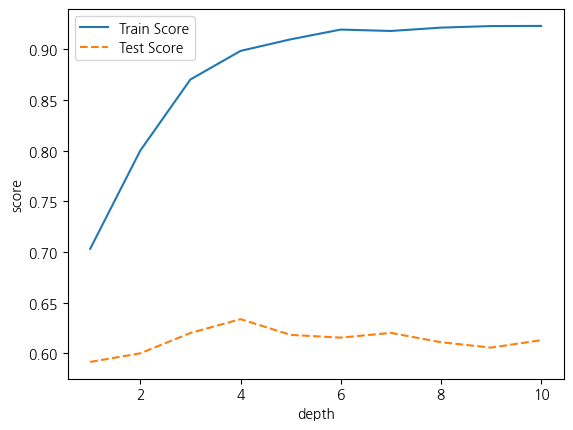

In [24]:
# 171 Page
# 모델 설명력 그래프 확인 : 4개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

In [25]:
# 172 Page
# learning_rate: 학습률 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# learning rate: 학습률 변경 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = 22, max_depth = 4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.898,0.634
1,0.2,0.950,0.611
2,0.3,0.967,0.597
3,0.4,0.980,0.537
4,0.5,0.987,0.513
5,0.6,0.989,0.484
6,0.7,0.992,0.483
7,0.8,0.995,0.424
8,0.9,0.995,0.474


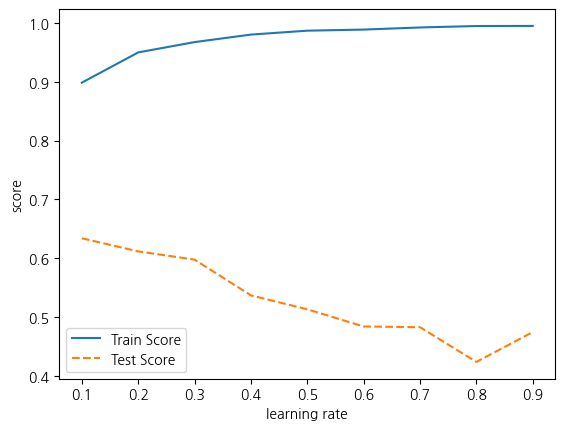

In [26]:
# 173 Page
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [27]:
# 174 Page
# 최종모델 선택
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.898
Score on test set: 0.634


In [28]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred =gb_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값 : 
 [10.65298241 16.32862334 33.23364844 16.679823   23.95106302 18.8652003
 13.2895896   6.71284329 16.07084615 26.63950962]


In [29]:
# 175 Page
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.773
2,HEIGHT,0.037
12,WRIST,0.026
4,CHEST,0.026
6,HIP,0.023
3,NECK,0.022
0,AGE,0.020
7,THIGH,0.020
8,KNEE,0.013
10,BICEPS,0.012


Text(0, 0.5, '변수')

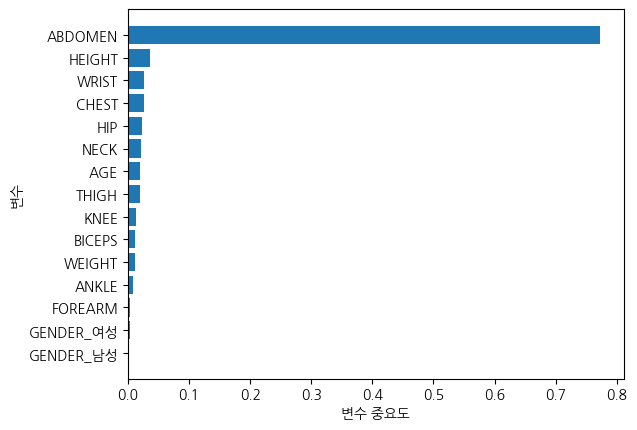

In [30]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [32]:
# 177 Page
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": [None, "sqrt", "log2"], 
              "learning_rate": para_lr, "max_depth": para_depth, "min_samples_leaf": para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=8,
                          random_state=1234)

best parameter: 
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 8}

best score: 
0.696
